In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import concatenate, Input,Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 2.0 Mount gdrive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [71]:
pathToFoler = "/content/drive/MyDrive/BDDA"
fileName = "/predictive_maintenance.csv"

In [72]:
df = pd.read_csv(pathToFoler+fileName)

In [73]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [75]:
df.shape

(10000, 9)

<Figure size 1080x576 with 0 Axes>

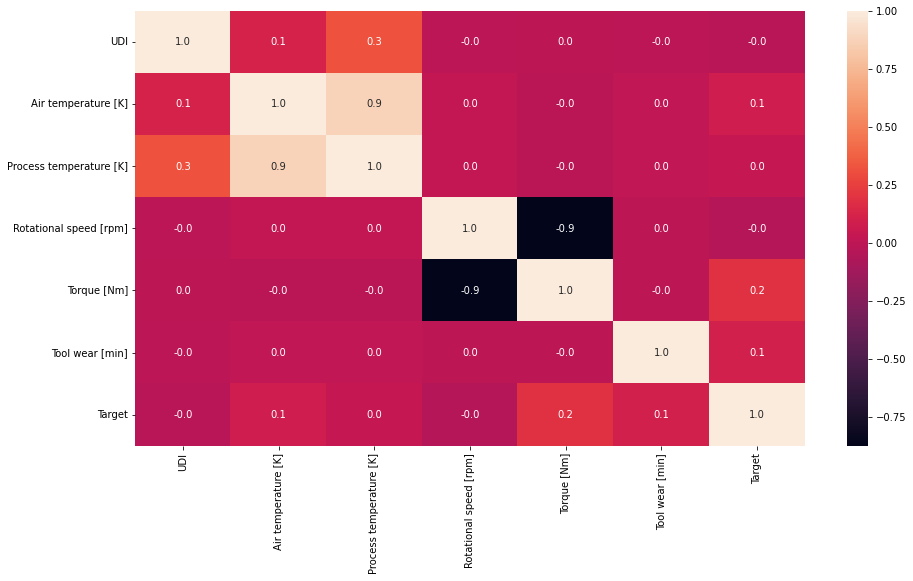

In [76]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, fmt="1.1f")

In [77]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

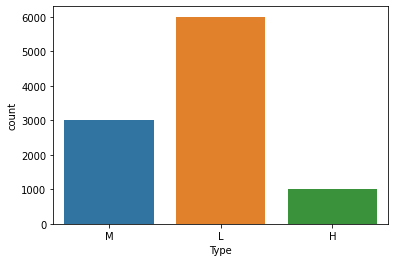

In [78]:
sns.countplot(data=df,x='Type')

In [79]:
cols_to_drop=['UDI','Product ID']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [80]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [81]:
type1=pd.get_dummies(df['Type'],drop_first=True)

In [82]:
df=pd.concat([df,type1],axis=1)
df.drop('Type',axis=1,inplace=True)

In [83]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0


In [84]:
x=df.drop(['Target'],axis=1)
y=df['Target']

print(x.shape,y.shape)

(10000, 7) (10000,)


In [85]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [86]:
print(y.value_counts())

1    9661
0    9661
Name: Target, dtype: int64


In [87]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   
X_test.shape

(15457, 7)

(3865, 7)

In [89]:
no_of_samples_tr = X_train.shape[0]            
input_features = X_train.shape[1]              
channels = 1
batch_size_tr = no_of_samples_tr 

In [90]:
no_of_samples_test = X_test.shape[0]           
input_features = X_test.shape[1]               
channels = 1
batch_size_test = no_of_samples_test

In [91]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [92]:
inputs = tf.keras.Input(shape = (X.shape[1],1))

In [93]:
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)


x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [94]:
x_rt = layers.Conv1D(filters = 32, kernel_size=3,activation='relu')(inputs)

x_rt = layers.Conv1D(filters = 32, kernel_size=3,activation='relu')(x_rt)

In [95]:
x = tf.keras.layers.concatenate([x_left,x_rt])
x = layers.Flatten()(x)

In [96]:
x = layers.Dense(64, activation = 'relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [97]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [98]:
model1 = Model(inputs = [inputs], outputs = [out])

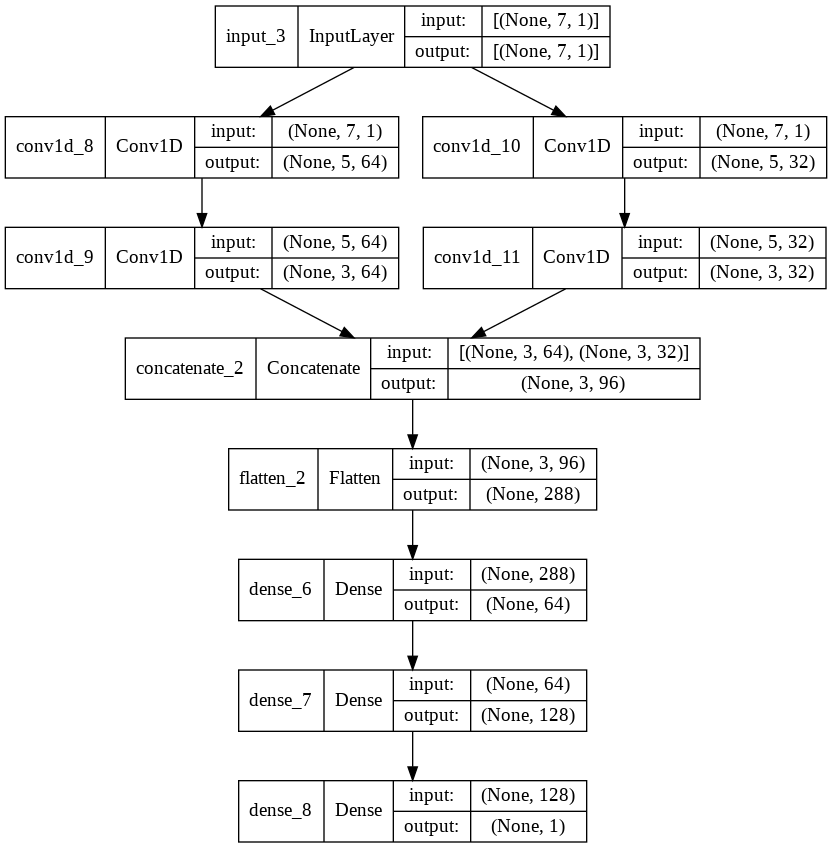

In [99]:
plot_model(model1, show_shapes= True)

In [100]:
model1.compile(loss = "mean_squared_error", optimizer='adam')  
history = model1.fit(
                    train,
                    y_train,
                    epochs = 10,
                    verbose = 1
                    )

Epoch 1/10
484/484 [==============================] - 2s 3ms/step - loss: 0.0691
Epoch 2/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0495
Epoch 3/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0438
Epoch 4/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0408
Epoch 5/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0374
Epoch 6/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0345
Epoch 7/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0334
Epoch 8/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0319
Epoch 9/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0297
Epoch 10/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0294


In [101]:
model1.evaluate(test,y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.0275


0.027537191286683083